Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

2024-11-18 10:37:53.062803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
import pathlib
from PIL import Image

# Root directory
root_dir = pathlib.Path('/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration')

# Check if the root directory exists
if not root_dir.exists():
    print(f"Directory {root_dir} does not exist.")

data_dir_train = root_dir / 'train'
data_dir_test = root_dir / 'test'


In [9]:
print(data_dir_train.exists())
print(data_dir_test.exists())

True
True


In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',label_mode='categorical',validation_split=0.2,subset='training',color_mode='rgb',batch_size=batch_size,image_size=(img_height, img_width),shuffle=True,seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',label_mode='categorical',validation_split=0.2,subset='validation',color_mode='rgb',batch_size=batch_size,image_size=(img_height, img_width),shuffle=True,seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [15]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [16]:
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")


Number of classes: 9


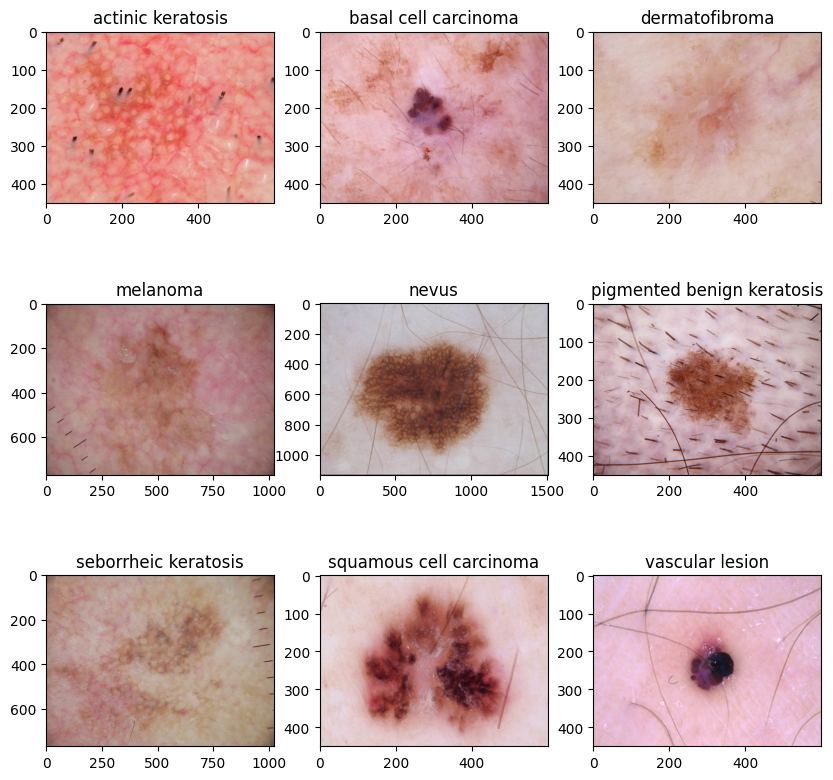

In [17]:
plt.figure(figsize=(10,10))
for i in range(9): # 9 is number of classes
  plt.subplot(3,3,i+1)
  image = plt.imread(
      str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [46]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
model=Sequential()
##normalization
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#First Convulation Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())

#Second Convolutaion Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D())

#Third Convolution Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D())

#Fourth Convolution Layer
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D())
model.add(Dropout(0.25))
#Flatten Layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,133,257 (8.14 MB)

 Trainable params: 2,133,257 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2024-11-18 08:19:32.716541: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 49 of 1000
2024-11-18 08:19:33.902698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.1841 - loss: 2.0811 - val_accuracy: 0.2975 - val_loss: 1.9098
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.3043 - loss: 1.8522 - val_accuracy: 0.4385 - val_loss: 1.6063
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4001 - loss: 1.6291 - val_accuracy: 0.4362 - val_loss: 1.5625
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4625 - loss: 1.4878 - val_accuracy: 0.4787 - val_loss: 1.5017
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.5080 - loss: 1.3933 - val_accuracy: 0.4765 - val_loss: 1.5100
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4940 - loss: 1.3659 - val_accuracy: 0.5235 - val_loss: 1.3788
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5727 - loss: 1.2037 - val_accuracy: 0.5168 - val_loss: 1.3845
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5597 - loss: 1.2356 - val_accuracy: 0.5369 - val_loss: 1.

### Visualizing training results

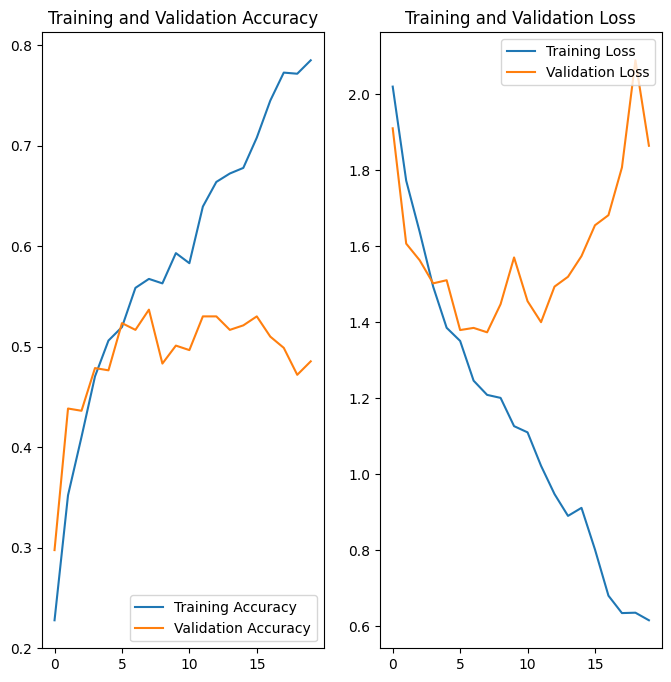

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1.Training accuracy improves consistently, reaching ~80%, and training loss decreases steadily, indicating the model is learning well on the training data. 
2. Validation accuracy plateaus and fluctuates after an initial rise, indicating overfitting starts after a few epochs. 
3. Validation loss decreases initially but starts increasing significantly in later epochs, confirming overfitting. 

## Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

In [6]:
augmentation_data= keras.Sequential([layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
                                     layers.RandomRotation(0.1),
                                     layers.RandomZoom(0.1)])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2024-11-18 11:00:40.058256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


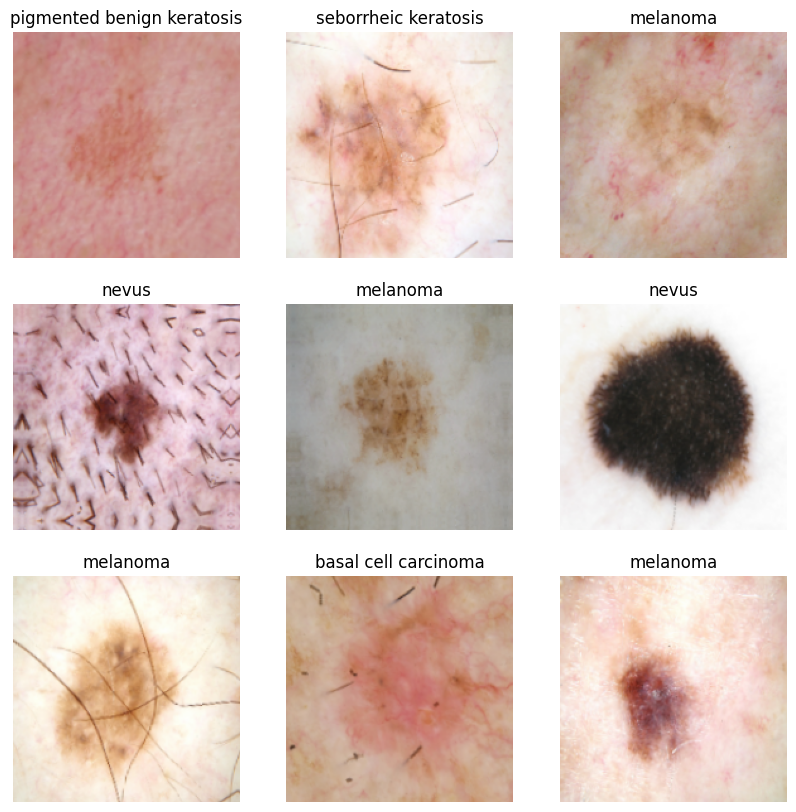

In [35]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)  # Assuming augmentation_data is a function that processes the images
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[i].numpy().astype('uint8'))  # Use i to index the augmented images
        label_index = tf.argmax(labels[i]).numpy()  # Convert one-hot encoded label to an integer
        plt.title(class_names[label_index])  # Display the label as title
        plt.axis('off')


### Todo:
### Create the model, compile and train the model


In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model2=Sequential()
#augmentation data
model2.add(augmentation_data)
##rescaling
model2.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#First Convulation Layer
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
#Second Convolutaion Layer
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
#Third Convolution Layer
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
#Fourth Convolution Layer
model2.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.25))
#Flatten Layer
model2.add(Flatten())  # Flatten the convolutional output
model2.add(Dense(128, activation='relu'))  # Add a fully connected layer
model2.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

### Compiling the model

In [38]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,133,257 (8.14 MB)

 Trainable params: 2,133,257 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [41]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2084 - loss: 2.0583 - val_accuracy: 0.3870 - val_loss: 1.7494
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.3228 - loss: 1.8635 - val_accuracy: 0.3781 - val_loss: 1.7011
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.4200 - loss: 1.6327 - val_accuracy: 0.3602 - val_loss: 1.7685
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4296 - loss: 1.6024 - val_accuracy: 0.4161 - val_loss: 1.6088
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4774 - loss: 1.5078 - val_accuracy: 0.3915 - val_loss: 1.6773
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4340 - loss: 1.5664 - val_accuracy: 0.4899 - val_loss: 1.4566
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4596 - loss: 1.4791 - val_accuracy: 0.4922 - val_loss: 1.4275
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5163 - loss: 1.3814 - val_accuracy: 0.4810 - v

### Visualizing the results

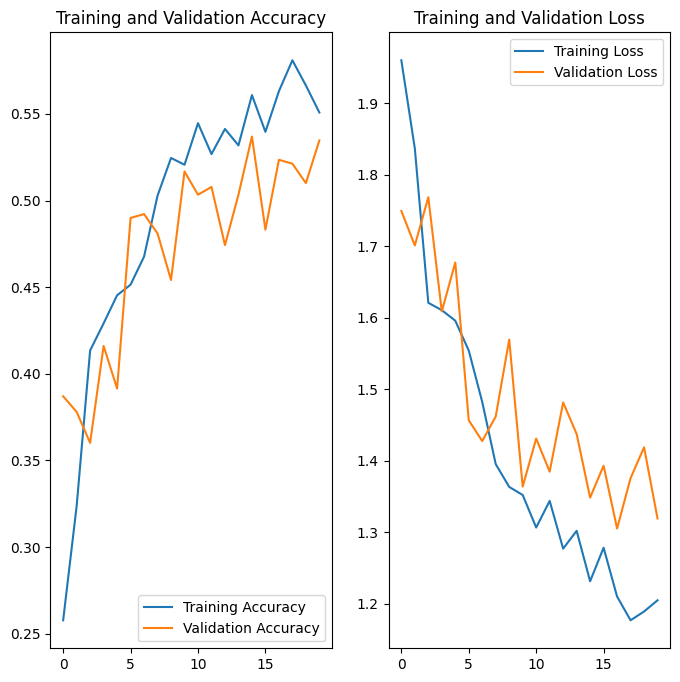

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Training accuracy improves steadily over epochs.
Validation accuracy shows fluctuations but generally follows the trend of training accuracy.
This suggests the model is learning but might be slightly overfitting, as the validation accuracy is less stable.
Training loss decreases consistently, indicating proper optimization.
Validation loss also decreases but shows fluctuations, suggesting potential overfitting

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [45]:

# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Iterate through each subfolder (class) in the directory
for class_dir in data_dir_train.iterdir():
    if class_dir.is_dir():  # Check if it's a directory (class)
        class_name = class_dir.name  # Name of the class
        num_images = len(list(class_dir.glob("*.jpg")))  # Count the number of .jpg files
        class_counts[class_name] = num_images

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'melanoma' has 438 images.
Class 'pigmented benign keratosis' has 462 images.
Class 'nevus' has 357 images.
Class 'basal cell carcinoma' has 376 images.
Class 'actinic keratosis' has 114 images.
Class 'squamous cell carcinoma' has 181 images.
Class 'vascular lesion' has 139 images.
Class 'seborrheic keratosis' has 77 images.
Class 'dermatofibroma' has 95 images.


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [46]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [47]:

path_to_training_dataset=pathlib.Path("/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
import Augmentor
for i in class_names:
   p = Augmentor.Pipeline(path_to_training_dataset / i)
   p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
   p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 376 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 95 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 438 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1484F03D0>: 100%|


Initialised with 357 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0


Initialised with 462 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x148400410>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x148B1AF50>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 139 image(s) found.
Output directory set to /Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [48]:
data_dir_train = pathlib.Path("/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [49]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010000.jpg_eea3154c-b77a-4d35-99d0-bc23bca4df24.jpg',
 '/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010785.jpg_ef99dbd0-b273-4c81-adc1-4d2d62a643b0.jpg',
 '/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010741.jpg_c2e48c6a-5fb0-4c45-aa8b-500aef1d0aa8.jpg',
 '/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010690.jpg_7ed21eb7-2e2e-4bb6-983f-850c810867c7.jpg',
 '/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin ca

In [50]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [51]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [52]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [53]:
new_df['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [54]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [25]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [77]:
model3=Sequential()
##rescaling-Normalisation
model3.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#First Convulation Layer
model3.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D())
#Second Convolutaion Layer
model3.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D())
#Third Convolution Layer
model3.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.5))
#Flatten Layer
model3.add(Flatten())  # Flatten the convolutional output
model3.add(Dense(128, activation='relu'))  # Add a fully connected layer
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [78]:
## your code goes here
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,022,537 (15.34 MB)

 Trainable params: 4,022,537 (15.34 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [79]:
#epochs = 30
## Your code goes here, use 50 epochs.
epochs = 50
history=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.2166 - loss: 2.0546 - val_accuracy: 0.3736 - val_loss: 1.7941
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3500 - loss: 1.7809 - val_accuracy: 0.2662 - val_loss: 1.9623
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3412 - loss: 1.7606 - val_accuracy: 0.3781 - val_loss: 1.7004
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4299 - loss: 1.6050 - val_accuracy: 0.5101 - val_loss: 1.4540
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4783 - loss: 1.4187 - val_accuracy: 0.4810 - val_loss: 1.5066
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4733 - loss: 1.4777 - val_accuracy: 0.5302 - val_loss: 1.3932
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5298 - loss: 1.3332 - val_accuracy: 0.5369 - val_loss: 1.3514
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5494 - loss: 1.3044 - val_accuracy: 0.5503 - val_loss

#### **Todo:**  Visualize the model results

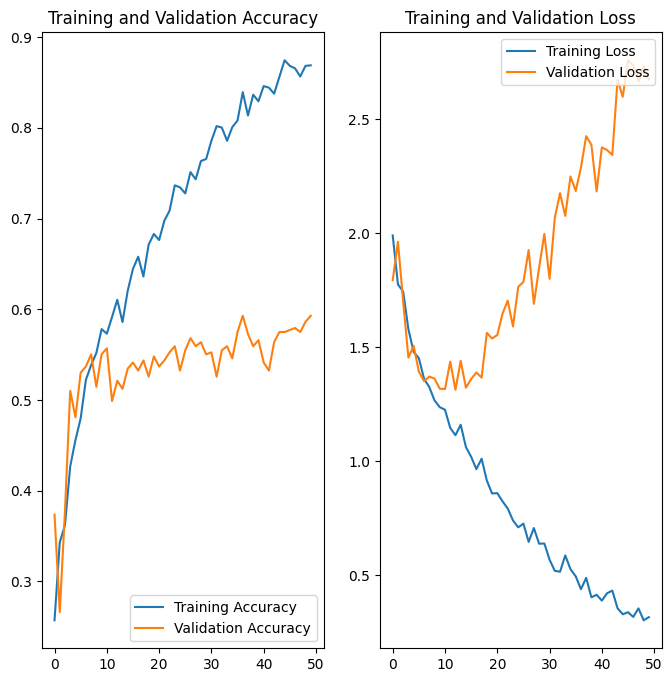

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



ith data augmentation added, show that the validation loss is still rising and fluctuating, while validation accuracy remains relatively flat. This indicates that although augmentation is adding some variety, it hasn’t fully resolved the overfitting or the model's inability to generalize well on validation data.